In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

mpl.rc('font', family='AppleGothic')  # macOS 기본 한글 지원 폰트
mpl.rcParams['axes.unicode_minus'] = False

data = pd.read_csv('nightlife_crime.csv')

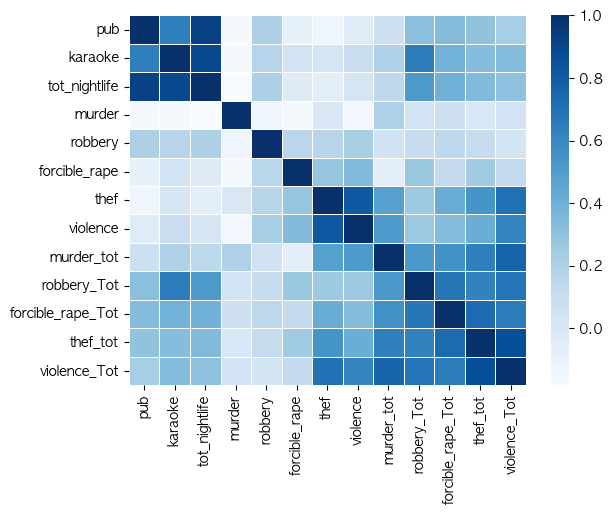

In [24]:
# 문자열 컬럼 제외하고 숫자형만 선택해서 상관행렬 계산
numeric_data = data.select_dtypes(include=['number'])  # 숫자형 컬럼만 추출
corr_matrix = numeric_data.corr(method='pearson')
corr_matrix

#heatmap
plt.figure()
sns.heatmap(data = numeric_data.corr(), annot=False,
            fmt = '.2f', linewidths=.5, cmap='Blues')
plt.show()

In [12]:


data['crime_tot'] = data['murder_tot'] + data['robbery_Tot'] + data['forcible_rape_Tot'] + data['thef_tot'] + data['violence_Tot']
data['murder_ratio'] = data['murder'] / data['murder_tot']
data['robbery_ratio'] = data['robbery'] / data['robbery_Tot']
data['rape_ratio'] = data['forcible_rape'] / data['forcible_rape_Tot']
data['thef_ratio'] = data['thef'] / data['thef_tot']
data['violence_ratio'] = data['violence'] / data['violence_Tot']
data['total_youth_ratio'] = (data['murder'] + data['robbery'] + data['forcible_rape'] + data['thef'] + data['violence']) / \
                          (data['murder_tot'] + data['robbery_Tot'] + data['forcible_rape_Tot'] + data['thef_tot'] + data['violence_Tot'])

data

,region,pub,karaoke,tot_nightlife,murder,robbery,forcible_rape,thef,violence,murder_tot,...,forcible_rape_Tot,thef_tot,violence_Tot,crime_tot,murder_ratio,robbery_ratio,rape_ratio,thef_ratio,violence_ratio,total_youth_ratio
0,강남,283,354,637,0,6,19,140,176,3,...,310,2484,2604,5422,0.000000,0.285714,0.061290,0.056361,0.067588,0.062892
1,강동,146,106,252,0,3,6,193,158,4,...,156,2366,2712,5244,0.000000,0.500000,0.038462,0.081572,0.058260,0.068650
2,강북,79,128,207,0,0,9,166,210,7,...,153,1434,2649,4257,0.000000,0.000000,0.058824,0.115760,0.079275,0.090439
3,강서,113,167,280,0,3,9,273,240,7,...,262,2096,3207,5585,0.000000,0.230769,0.034351,0.130248,0.074836,0.094002
4,관악,223,99,322,0,2,14,170,209,9,...,320,2706,3298,6345,0.000000,0.166667,0.043750,0.062823,0.063372,0.062254
5,광진,19,91,110,0,0,29,155,153,4,...,240,3026,2625,5909,0.000000,0.000000,0.120833,0.051223,0.058286,0.057032
6,구로,38,110,148,0,1,3,157,194,8,...,281,2335,3007,5646,0.000000,0.066667,0.010676,0.067238,0.064516,0.062876
7,금천,60,82,142,0,0,7,146,66,3,...,151,1567,2054,3781,0.000000,0.000000,0.046358,0.093172,0.032132,0.057921
8,노원,30,57,87,0,6,14,227,337,10,...,197,2193,2723,5130,0.000000,0.857143,0.071066,0.103511,0.123761,0.113840
9,도봉,21,55,76,0,6,21,126,107,3,...,102,1063,1487,2664,0.000000,0.666667,0.205882,0.118532,0.071957,0.097598


## 산점도

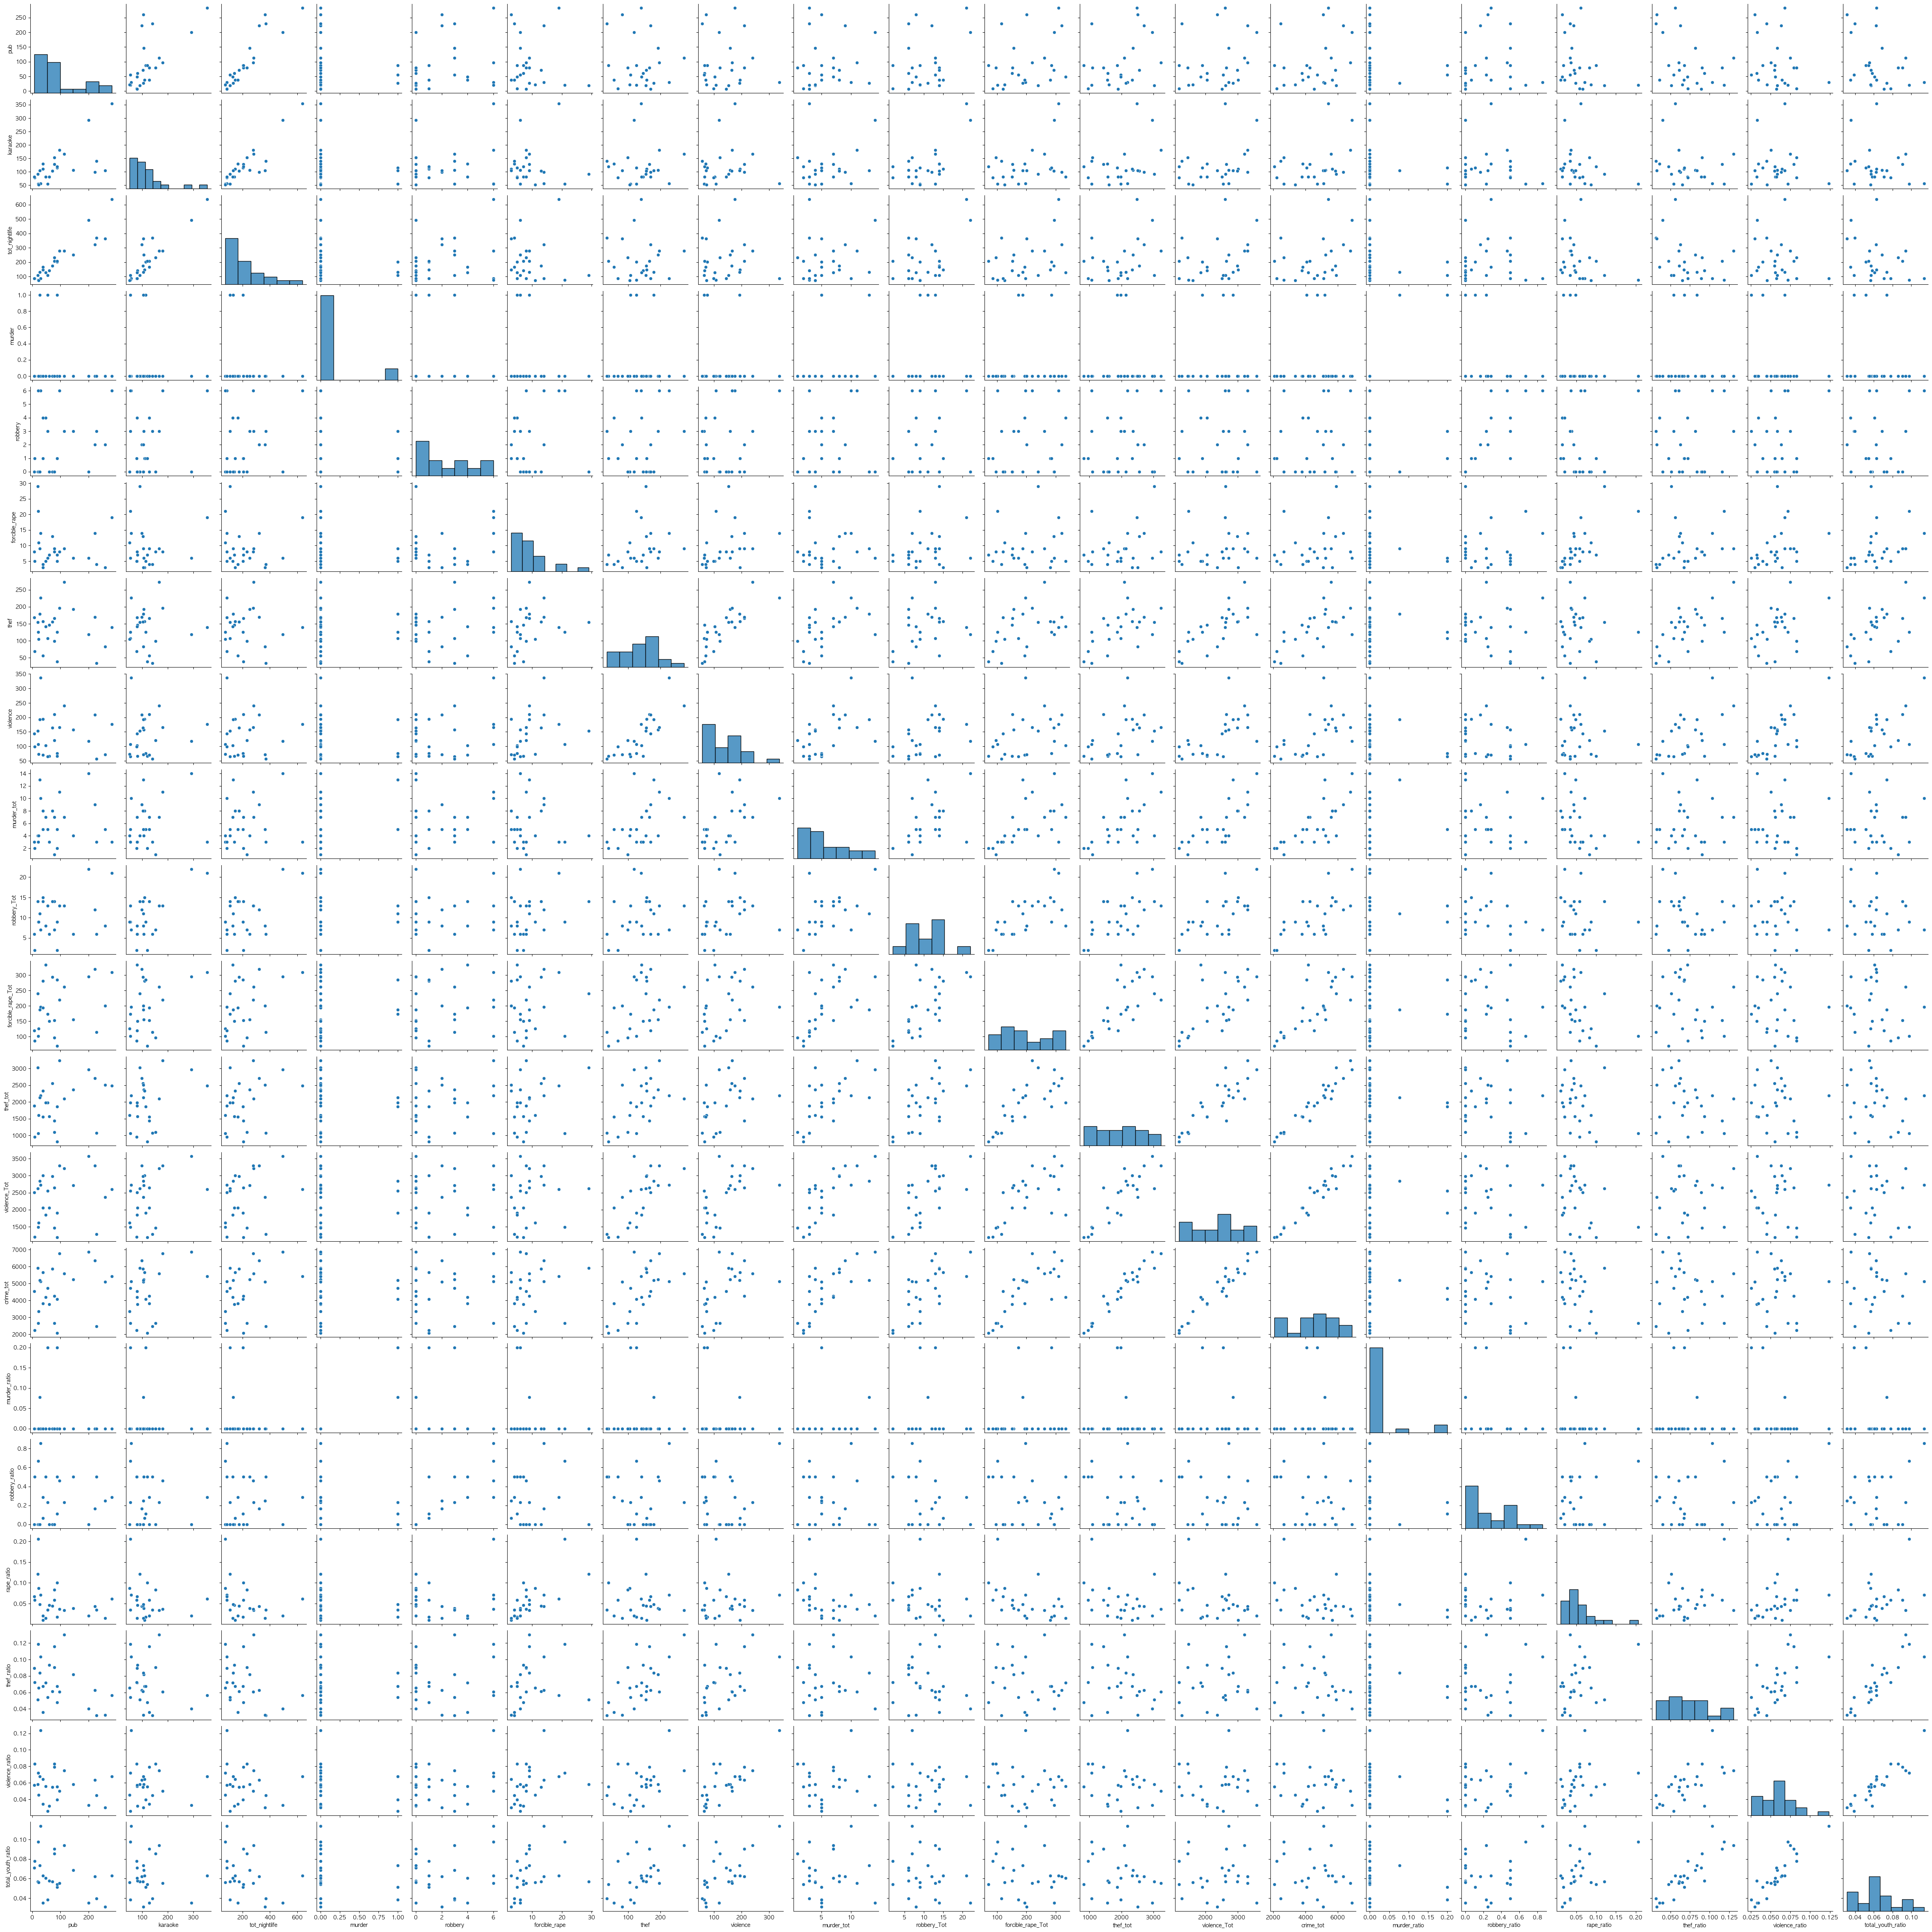

In [10]:
sns.pairplot(data)
plt.savefig('image/figure05.png')
plt.show()

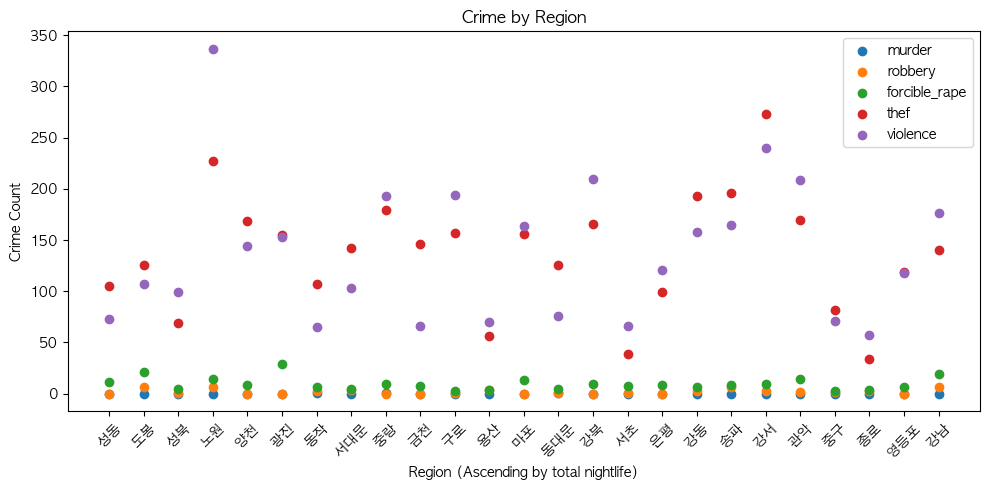

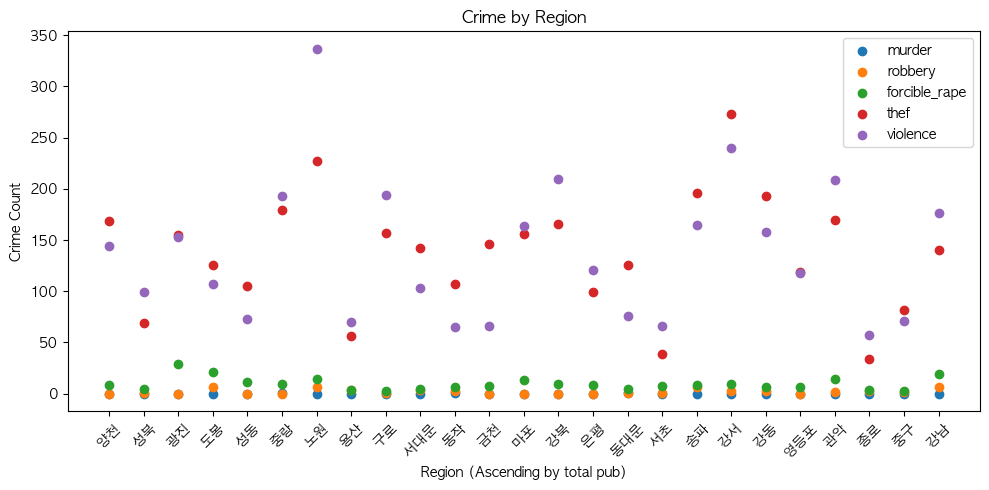

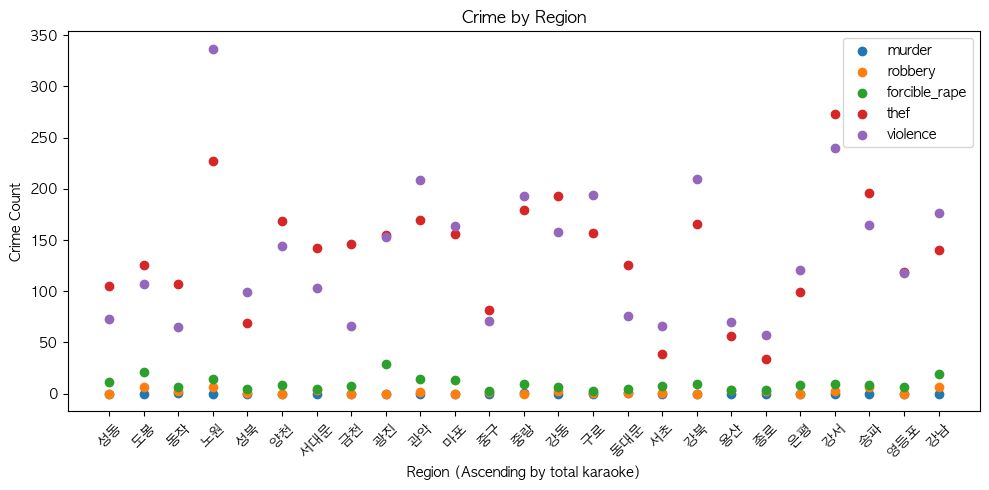

In [58]:
# 산점도

# 유흥업소 점포수 오름차순으로 지역 정렬, 산점도
sort = data.sort_values(by='tot_nightlife',ascending=True)

plt.figure(figsize=(10, 5))
plt.scatter(sort['region'], sort['murder'], label='murder')
plt.scatter(sort['region'], sort['robbery'], label='robbery')
plt.scatter(sort['region'], sort['forcible_rape'], label='forcible_rape')
plt.scatter(sort['region'], sort['thef'], label='thef')
plt.scatter(sort['region'], sort['violence'], label='violence')
plt.scatter
plt.xticks(rotation=45)
plt.xlabel('Region (Ascending by total nightlife)')
plt.ylabel('Crime Count')
plt.title('Crime by Region')
plt.tight_layout()
plt.legend()
plt.savefig('image/figure01.png')
plt.show()

# pub 점포수 오름차순으로 지역 정렬, 산점도
sort = data.sort_values(by='pub',ascending=True)

plt.figure(figsize=(10, 5))
plt.scatter(sort['region'], sort['murder'], label='murder')
plt.scatter(sort['region'], sort['robbery'], label='robbery')
plt.scatter(sort['region'], sort['forcible_rape'], label='forcible_rape')
plt.scatter(sort['region'], sort['thef'], label='thef')
plt.scatter(sort['region'], sort['violence'], label='violence')
plt.scatter
plt.xticks(rotation=45)
plt.xlabel('Region (Ascending by total pub)')
plt.ylabel('Crime Count')
plt.title('Crime by Region')
plt.tight_layout()
plt.legend()
plt.savefig('image/figure02.png')
plt.show()

# karaoke 점포수 오름차순으로 지역 정렬, 산점도

sort = data.sort_values(by='karaoke',ascending=True)

plt.figure(figsize=(10, 5))
plt.scatter(sort['region'], sort['murder'], label='murder')
plt.scatter(sort['region'], sort['robbery'], label='robbery')
plt.scatter(sort['region'], sort['forcible_rape'], label='forcible_rape')
plt.scatter(sort['region'], sort['thef'], label='thef')
plt.scatter(sort['region'], sort['violence'], label='violence')
plt.scatter
plt.xticks(rotation=45)
plt.xlabel('Region (Ascending by total karaoke)')
plt.ylabel('Crime Count')
plt.title('Crime by Region')
plt.tight_layout()
plt.legend()
plt.savefig('image/figure03.png')
plt.show()


> 점포수 별로 범죄율 증가 안하는 것 같은데...?

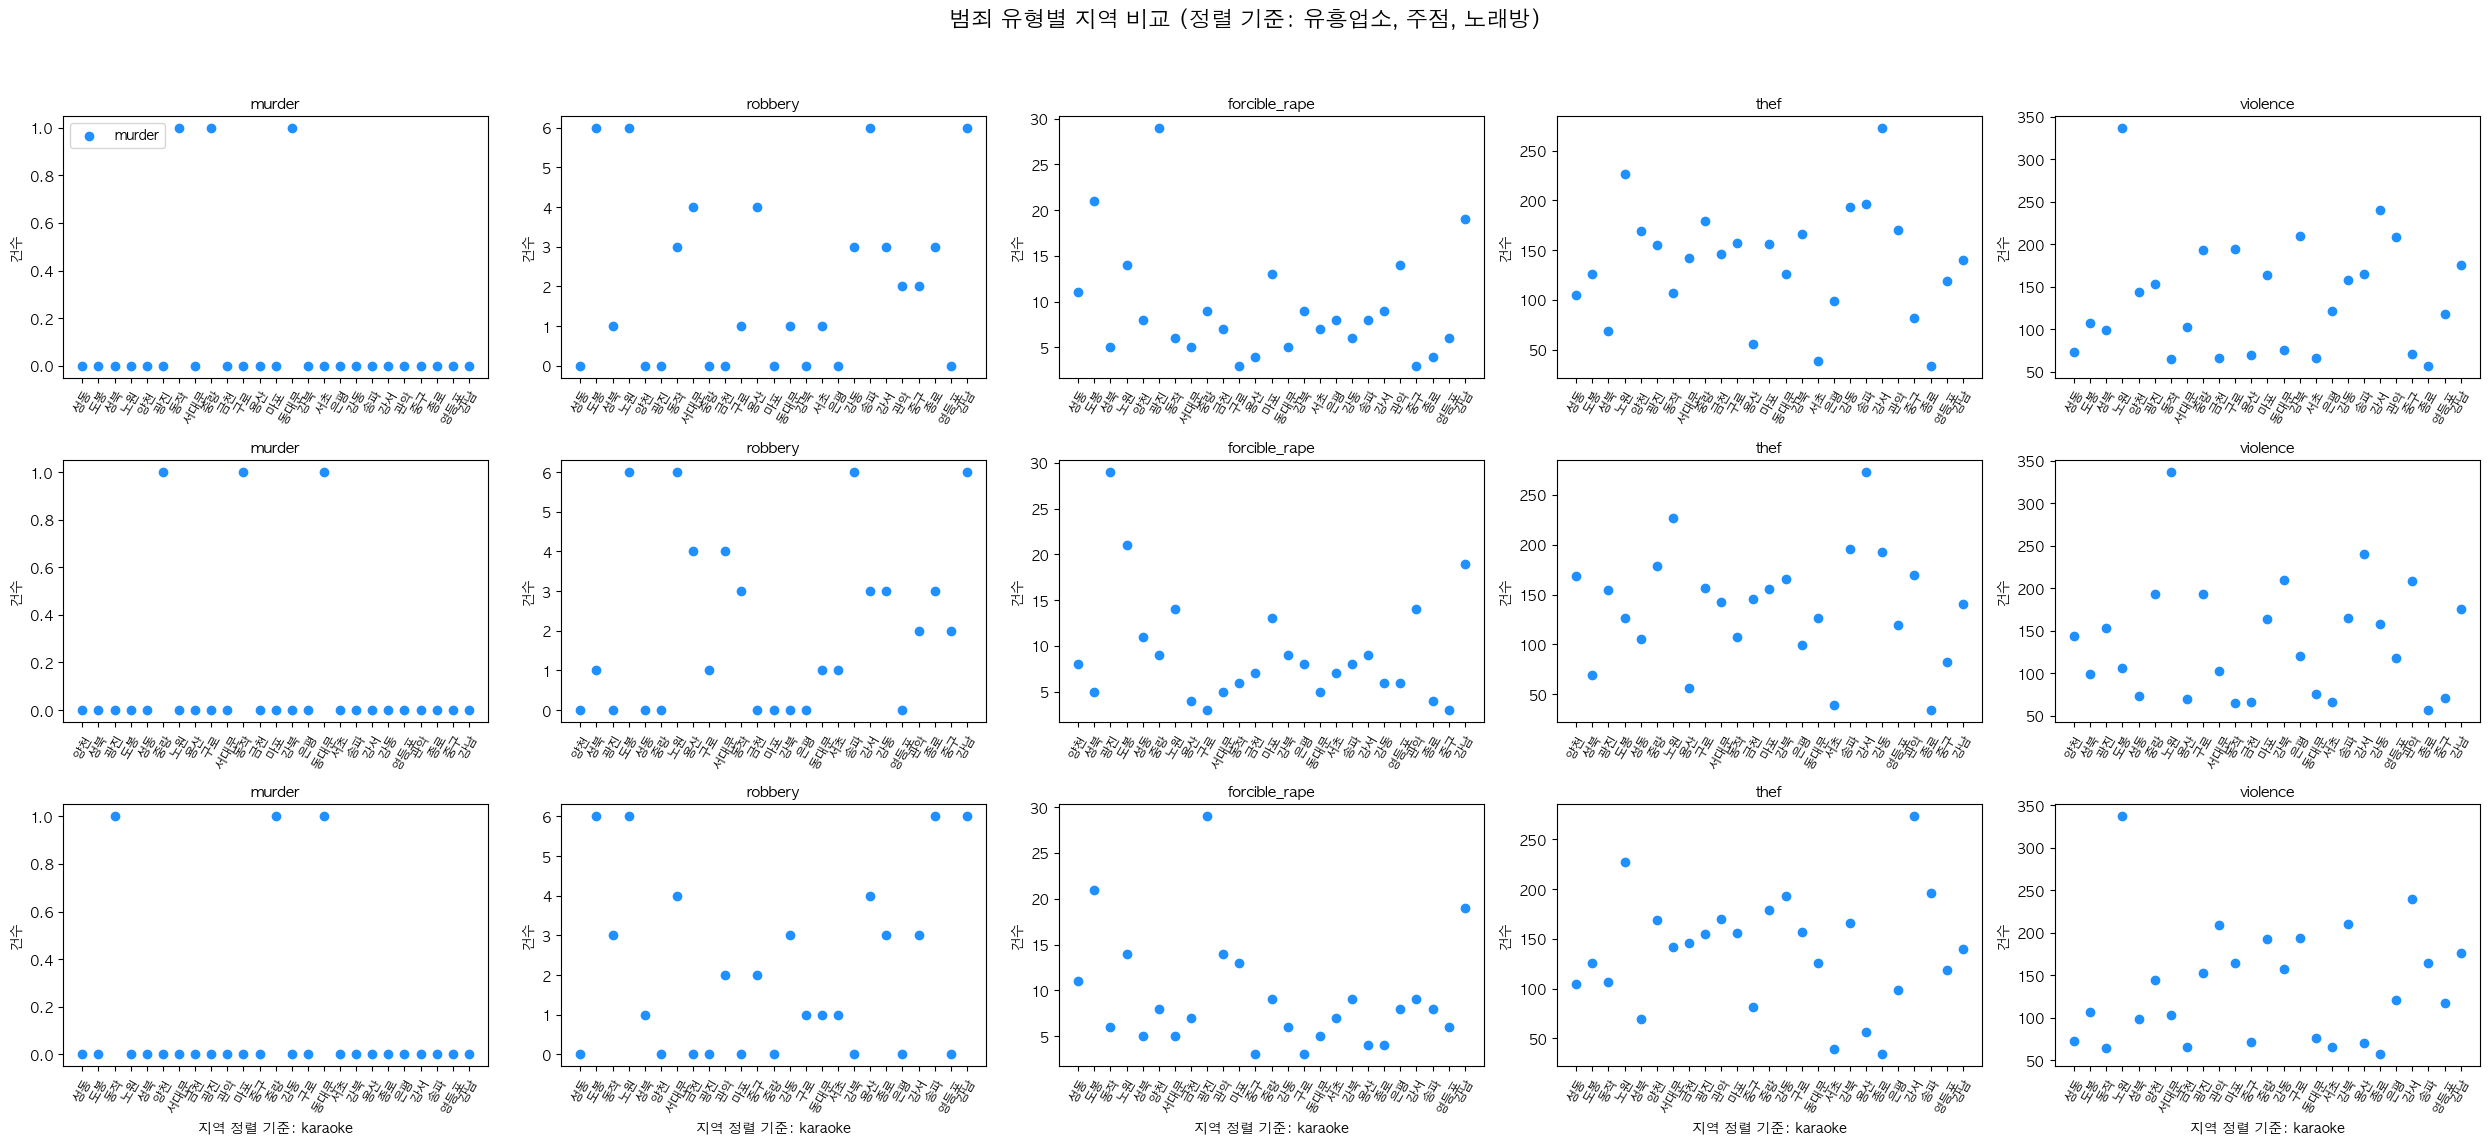

In [57]:
# 정렬 기준과 컬럼 이름
sort_keys = ['tot_nightlife', 'pub', 'karaoke']
crime_cols = ['murder', 'robbery', 'forcible_rape', 'thef', 'violence']

# 서브플롯 생성 (3행 x 5열)
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 12))
fig.suptitle('범죄 유형별 지역 비교 (정렬 기준: 유흥업소, 주점, 노래방)', fontsize=16)
plt.subplots_adjust(hspace=0.4)

# 반복해서 각 그래프 그리기
for i, sort_key in enumerate(sort_keys):
    sorted_data = data.sort_values(by=sort_key, ascending=True)
    for j, crime in enumerate(crime_cols):
        ax = axes[i, j]
        ax.scatter(sorted_data['region'], sorted_data[crime], color='dodgerblue', label=crime)
        ax.set_title(f"{crime}", fontsize=11)
        ax.set_xticks(range(len(sorted_data['region'])))
        ax.set_xticklabels(sorted_data['region'], rotation=60, fontsize=9)
        ax.set_ylabel('건수')
        if i == 2:  # 마지막 행만 x축 라벨
            ax.set_xlabel(f"지역 정렬 기준: {sort_key}")

# 범례는 하나만 따로
axes[0, 0].legend(loc='upper left')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # 제목 영역 확보
plt.savefig('image/figure04.png')
plt.show()


# 피어슨 상관계수

분석 기준
- 0.7 이상: 강한 양의 상관
- 0.3 ~ 0.7: 중간 정도의 상관
- 0 ~ 0.3: 약한 상관
- 음수: 반비례 관계


In [15]:
# 문자열 컬럼 제외하고 숫자형만 선택해서 상관행렬 계산
numeric_data = data.select_dtypes(include=['number'])  # 숫자형 컬럼만 추출
corr_matrix = numeric_data.corr(method='pearson')
corr_matrix

,pub,karaoke,tot_nightlife,murder,robbery,forcible_rape,thef,violence,murder_tot,robbery_Tot,forcible_rape_Tot,thef_tot,violence_Tot,crime_tot,murder_ratio,robbery_ratio,rape_ratio,thef_ratio,violence_ratio,total_youth_ratio
pub,1.000000,0.645022,0.922502,-0.166262,0.206950,-0.087177,-0.122257,-0.040994,0.072228,0.318181,0.334303,0.300736,0.233037,0.283625,-0.122442,0.038932,-0.331106,-0.410418,-0.247990,-0.380246
karaoke,0.645022,1.000000,0.889996,-0.161529,0.170792,0.041389,0.017581,0.095926,0.205042,0.652071,0.387320,0.327938,0.337151,0.354027,-0.167796,-0.140817,-0.235801,-0.240293,-0.083646,-0.199648
tot_nightlife,0.922502,0.889996,1.000000,-0.180798,0.209755,-0.031111,-0.064069,0.023993,0.146668,0.519228,0.395118,0.345094,0.309352,0.348061,-0.157817,-0.047899,-0.316674,-0.366268,-0.190224,-0.327734
murder,-0.166262,-0.161529,-0.180798,1.000000,-0.128090,-0.161566,0.000619,-0.142715,0.197589,0.042136,0.075428,0.007788,0.038845,0.028417,0.931955,-0.195233,-0.192183,-0.041048,-0.240056,-0.163895
robbery,0.206950,0.170792,0.209755,-0.128090,1.000000,0.160439,0.168731,0.223769,0.045288,0.102684,0.147945,0.112583,0.035530,0.081306,-0.064363,0.786430,0.118641,0.063735,0.224117,0.189447
forcible_rape,-0.087177,0.041389,-0.031111,-0.161566,0.160439,1.000000,0.285533,0.340591,-0.065149,0.274810,0.127463,0.256641,0.130125,0.197819,-0.184743,0.002491,0.708211,0.203778,0.341547,0.350607
thef,-0.122257,0.017581,-0.064069,0.000619,0.168731,0.285533,1.000000,0.811187,0.486157,0.264591,0.417398,0.538971,0.707235,0.644191,-0.065892,-0.041870,-0.059256,0.652045,0.446321,0.575112
violence,-0.040994,0.095926,0.023993,-0.142715,0.223769,0.340591,0.811187,1.000000,0.512233,0.268458,0.337486,0.411275,0.620140,0.533981,-0.240540,0.126289,0.006467,0.526944,0.767925,0.691487
murder_tot,0.072228,0.205042,0.146668,0.197589,0.045288,-0.065149,0.486157,0.512233,1.000000,0.524660,0.560966,0.638719,0.763267,0.731152,0.045397,-0.102319,-0.380394,-0.005993,0.063223,-0.004214
robbery_Tot,0.318181,0.652071,0.519228,0.042136,0.102684,0.274810,0.264591,0.268458,0.524660,1.000000,0.675633,0.630395,0.689725,0.697052,0.039269,-0.390045,-0.206632,-0.165370,-0.172480,-0.214502


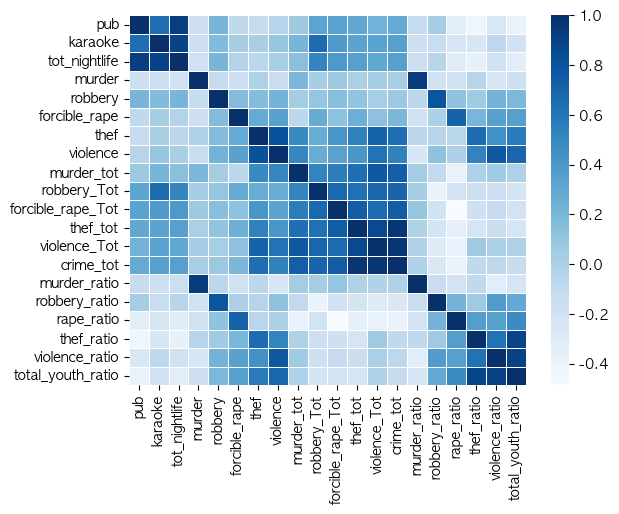

In [18]:
plt.figure()
sns.heatmap(data = numeric_data.corr(), annot=False,
            fmt = '.2f', linewidths=.5, cmap='Blues')
plt.show()